In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("datasets/dengue_molecules.csv")
df.head()

,canonical_smiles,standard_value,type,units,ECFP4
0,O=C(O)/C=C/c1ccc(OS(=O)(=O)O)cc1,2000000.0,IC50,mM,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ..."
1,CN(CCCNC(=O)c1ccc(O)cc1)CCCNC(=O)c1ccc(O)cc1,2000000.0,IC50,mM,"['0', '0', '0', '0', '0', '0', '0', '0', '1', ..."
2,CCN(CCCN(CC)C(=O)c1ccc(O)cc1)C(=O)c1ccc(O)cc1,2000000.0,IC50,mM,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ..."
3,CN(CCCNC(=O)c1ccc(O)cc1)CCCNC(=O)c1ccc2cc(O)cc...,294000.0,IC50,uM,"['0', '0', '0', '0', '0', '0', '0', '0', '1', ..."
4,CCN(CCOC(=O)/C=C/c1ccc(O)cc1)Cc1cc(Cl)ccc1O,46000.0,IC50,uM,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ..."


Check NaN values

In [4]:
# Filter the DataFrame to get rows where units are NaN
df_nan_units = df[df['units'].isna()]
df_nan_units

,canonical_smiles,standard_value,type,units,ECFP4
49,O=C(c1ccc(C(F)(F)F)cc1O)c1[nH]c(Cl)c(Cl)c1-n1c...,NaN,IC50,NaN,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ..."
51,O=C(c1ccc(C(F)(F)F)cc1O)c1[nH]c(Cl)c(Cl)c1-n1c...,NaN,IC50,NaN,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ..."
53,O=C(c1ccc(C(F)(F)F)cc1O)c1[nH]c(Cl)c(Cl)c1-n1c...,NaN,IC50,NaN,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ..."
56,O=C(c1ccc(C(F)(F)F)cc1O)c1[nH]c(Cl)c(Cl)c1-n1c...,NaN,IC50,NaN,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ..."
57,O=C(c1ccc(C(F)(F)F)cc1O)c1[nH]c(Cl)c(Cl)c1-n1c...,NaN,IC50,NaN,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ..."
...,...,...,...,...,...
1600,N/C(=N\O)c1cccc(-c2ccc3c(c2)c2cc(-c4cccc(/C(N)...,NaN,IC50,NaN,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ..."
1602,COc1ccc(S(=O)(=O)n2c3ccc(-c4cccc(/C(N)=N/O)c4)...,NaN,IC50,NaN,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ..."
1607,CC(C)(C)c1ccc(-c2ccc3[nH]c(C(=O)NCC4CCNCC4)cc3...,NaN,IC50,NaN,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ..."
1662,COc1cc2nc(NC(=O)c3ccccc3Sc3ccc(C(F)(F)F)cc3)sc...,NaN,IC50,NaN,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ..."


In [5]:
# Drop rows where 'units' is NaN
df = df.dropna(subset=['units'])

1. Check the unique values in the `units` column to determine which units are present.
2. Convert all values in the `standard_value` column to a unified unit (preferably the most common one).
3. Covnert the unified `standard_value` to pIC50


In [6]:
# Check the unique values in the units column
unique_units = df['units'].unique()
unique_units

array(['mM', 'uM', 'ug ml-1', 'nM', 'umol/L'], dtype=object)

The unique units present in the data are:
1. mM (millimolar)
2. uM (micromolar)
3. ug ml-1 (micrograms per milliliter)
4. nM (nanomolar)
6. umol/L (micromolar, same as uM)

The conversion process will involve the following steps:

1. Convert mM to uM: $$1 \, \text{mM} = 1000 \, \text{uM}$$
2. Convert ug ml-1 to uM: This requires knowledge of the molecular weight of the compounds.
3. Convert nM to uM: $$1 \, \text{nM} = 0.001 \, \text{uM}$$
4. Merge the 'uM' and 'umol/L' categories since they represent the same unit.

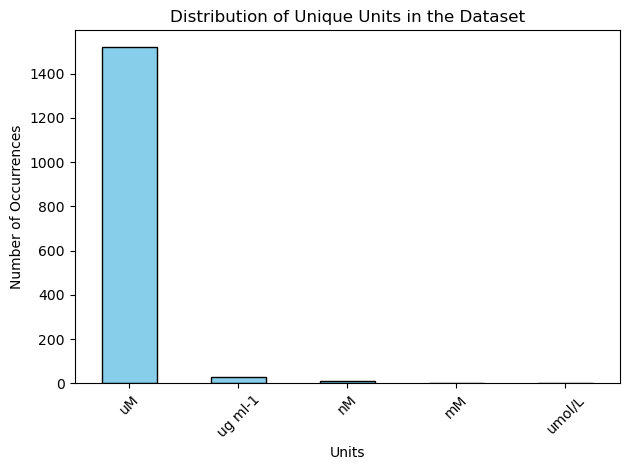

In [7]:
import matplotlib.pyplot as plt

# Plot the distribution of unique unit types
unit_counts = df['units'].value_counts()
unit_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Unique Units in the Dataset')
plt.xlabel('Units')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [8]:
# rows where units are 'ug ml-1'
df_ug_ml = df[df['units'] == 'ug ml-1']
df_ug_ml


,canonical_smiles,standard_value,type,units,ECFP4
42,Nc1ncc(Br)c2c1ncn2[C@H]1C=C[C@H](O)[C@@H]1O,7.200,IC50,ug ml-1,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ..."
154,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)ccc12,55.000,IC50,ug ml-1,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ..."
155,O=c1cc(-c2ccccc2)oc2cc(O)c(O)c(O)c12,6.460,IC50,ug ml-1,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ..."
156,O.O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,35.700,IC50,ug ml-1,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ..."
198,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,176.260,IC50,ug ml-1,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ..."
199,COc1ccc([C@@H]2CC(=O)c3c(O)cc(O[C@@H]4O[C@H](C...,13.100,IC50,ug ml-1,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ..."
200,O=C(O)[C@H]1O[C@@H](Oc2cc3oc(-c4ccccc4)cc(=O)c...,13.500,IC50,ug ml-1,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ..."
201,O=C(O)[C@H]1O[C@@H](Oc2cc3oc(-c4ccccc4)cc(=O)c...,8.740,IC50,ug ml-1,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ..."
364,COC(=N)c1ncn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)n1,76.000,IC50,ug ml-1,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ..."
365,Cl.N=C(N)c1ncn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]...,100.000,IC50,ug ml-1,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ..."


In [9]:
from rdkit import Chem
from rdkit.Chem import Descriptors

def compute_mol_weight(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        return Descriptors.MolWt(mol)
    except:
        return np.nan

def convert_to_uM(value, unit, smiles=None):
    if unit == "mM":
        return value * 1000
    elif unit == "nM":
        return value * 0.001
    elif unit in ["uM", "umol/L"]:
        return value
    elif unit == "ug ml-1" and smiles:  # If SMILES string is provided
        mol_weight = compute_mol_weight(smiles)
        if mol_weight:
            return (value * 1000) / mol_weight
        else:
            return np.nan
    else:
        return np.nan  # For other unspecified units

# applying the function
df['standard_value_uM'] = df.apply(lambda row: convert_to_uM(row['standard_value'], row['units'], row['canonical_smiles']), axis=1)
df

,canonical_smiles,standard_value,type,units,ECFP4,standard_value_uM
0,O=C(O)/C=C/c1ccc(OS(=O)(=O)O)cc1,2000000.0,IC50,mM,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ...",2.000000e+09
1,CN(CCCNC(=O)c1ccc(O)cc1)CCCNC(=O)c1ccc(O)cc1,2000000.0,IC50,mM,"['0', '0', '0', '0', '0', '0', '0', '0', '1', ...",2.000000e+09
2,CCN(CCCN(CC)C(=O)c1ccc(O)cc1)C(=O)c1ccc(O)cc1,2000000.0,IC50,mM,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ...",2.000000e+09
3,CN(CCCNC(=O)c1ccc(O)cc1)CCCNC(=O)c1ccc2cc(O)cc...,294000.0,IC50,uM,"['0', '0', '0', '0', '0', '0', '0', '0', '1', ...",2.940000e+05
4,CCN(CCOC(=O)/C=C/c1ccc(O)cc1)Cc1cc(Cl)ccc1O,46000.0,IC50,uM,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ...",4.600000e+04
...,...,...,...,...,...,...
1680,Cc1ccc(S(=O)(=O)Nc2ccc(-c3nnc(SCc4ccc(C(F)(F)F...,25200.0,IC50,uM,"['0', '0', '0', '0', '1', '0', '0', '0', '0', ...",2.520000e+04
1681,Cc1ccc(S(=O)(=O)Nc2ccc(-c3nnc(SCc4cccc(C(F)(F)...,23900.0,IC50,uM,"['0', '0', '0', '0', '1', '0', '0', '0', '0', ...",2.390000e+04
1682,Cc1ccc(S(=O)(=O)Nc2ccc(-c3nnc(SCc4ccccc4C(F)(F...,24000.0,IC50,uM,"['0', '0', '0', '0', '1', '0', '0', '0', '0', ...",2.400000e+04
1683,O=C(N[C@@H](Cc1ccc(O)cc1)C(=O)O)c1cc(-c2ccccc2...,9610.0,IC50,uM,"['0', '1', '1', '0', '0', '0', '0', '0', '0', ...",9.610000e+03


In [10]:
# Filter the DataFrame to get rows where standard_value_uM are NaN
df_nan_units = df[df['standard_value_uM'].isna()]
df_nan_units

,canonical_smiles,standard_value,type,units,ECFP4,standard_value_uM


# Convert IC50 to pIC50
The IC50 value represents the concentration of a compound required to inhibit a biological or biochemical function by 50%. However, in many analyses, it is more convenient to work with a scale that is linear rather than exponential. This is where the pIC50 comes into play.

The pIC50 is the negative logarithm (base 10) of the IC50 value (when IC50 is in molar units). The transformation to pIC50 helps in making the data more normally distributed, which can be beneficial for various statistical analyses and machine learning models.

$$\text{pIC50} = -\log_{10}(\text{IC50})$$

In [11]:
df['pIC50'] = -np.log10(df['standard_value_uM'] * 1e-9)
df

,canonical_smiles,standard_value,type,units,ECFP4,standard_value_uM,pIC50
0,O=C(O)/C=C/c1ccc(OS(=O)(=O)O)cc1,2000000.0,IC50,mM,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ...",2.000000e+09,-0.301030
1,CN(CCCNC(=O)c1ccc(O)cc1)CCCNC(=O)c1ccc(O)cc1,2000000.0,IC50,mM,"['0', '0', '0', '0', '0', '0', '0', '0', '1', ...",2.000000e+09,-0.301030
2,CCN(CCCN(CC)C(=O)c1ccc(O)cc1)C(=O)c1ccc(O)cc1,2000000.0,IC50,mM,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ...",2.000000e+09,-0.301030
3,CN(CCCNC(=O)c1ccc(O)cc1)CCCNC(=O)c1ccc2cc(O)cc...,294000.0,IC50,uM,"['0', '0', '0', '0', '0', '0', '0', '0', '1', ...",2.940000e+05,3.531653
4,CCN(CCOC(=O)/C=C/c1ccc(O)cc1)Cc1cc(Cl)ccc1O,46000.0,IC50,uM,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ...",4.600000e+04,4.337242
...,...,...,...,...,...,...,...
1680,Cc1ccc(S(=O)(=O)Nc2ccc(-c3nnc(SCc4ccc(C(F)(F)F...,25200.0,IC50,uM,"['0', '0', '0', '0', '1', '0', '0', '0', '0', ...",2.520000e+04,4.598599
1681,Cc1ccc(S(=O)(=O)Nc2ccc(-c3nnc(SCc4cccc(C(F)(F)...,23900.0,IC50,uM,"['0', '0', '0', '0', '1', '0', '0', '0', '0', ...",2.390000e+04,4.621602
1682,Cc1ccc(S(=O)(=O)Nc2ccc(-c3nnc(SCc4ccccc4C(F)(F...,24000.0,IC50,uM,"['0', '0', '0', '0', '1', '0', '0', '0', '0', ...",2.400000e+04,4.619789
1683,O=C(N[C@@H](Cc1ccc(O)cc1)C(=O)O)c1cc(-c2ccccc2...,9610.0,IC50,uM,"['0', '1', '1', '0', '0', '0', '0', '0', '0', ...",9.610000e+03,5.017277


In [12]:
# Convert the 'ECFP4' column to a DataFrame
ecfp4_df = df['ECFP4'].apply(pd.Series)
ecfp4_df

,0
0,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ..."
1,"['0', '0', '0', '0', '0', '0', '0', '0', '1', ..."
2,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ..."
3,"['0', '0', '0', '0', '0', '0', '0', '0', '1', ..."
4,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ..."
...,...
1680,"['0', '0', '0', '0', '1', '0', '0', '0', '0', ..."
1681,"['0', '0', '0', '0', '1', '0', '0', '0', '0', ..."
1682,"['0', '0', '0', '0', '1', '0', '0', '0', '0', ..."
1683,"['0', '1', '1', '0', '0', '0', '0', '0', '0', ..."


In [13]:
# Convert the string representations in the ECFP4 column into actual lists
df['ECFP4'] = df['ECFP4'].apply(lambda x: list(map(int, eval(x))))

# Convert the 'ECFP4' column to a DataFrame
ecfp4_df = df['ECFP4'].apply(pd.Series)

# Rename the columns
ecfp4_df.columns = [f'ECFP4_{i}' for i in range(2048)]

# Concatenate the original DataFrame with the new ECFP4 columns
df_expanded = pd.concat([df, ecfp4_df], axis=1)

# Optionally, drop the original 'ECFP4' column
df_expanded = df_expanded.drop(columns='ECFP4')
df_expanded

,canonical_smiles,standard_value,type,units,standard_value_uM,pIC50,ECFP4_0,ECFP4_1,ECFP4_2,ECFP4_3,...,ECFP4_2038,ECFP4_2039,ECFP4_2040,ECFP4_2041,ECFP4_2042,ECFP4_2043,ECFP4_2044,ECFP4_2045,ECFP4_2046,ECFP4_2047
0,O=C(O)/C=C/c1ccc(OS(=O)(=O)O)cc1,2000000.0,IC50,mM,2.000000e+09,-0.301030,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CN(CCCNC(=O)c1ccc(O)cc1)CCCNC(=O)c1ccc(O)cc1,2000000.0,IC50,mM,2.000000e+09,-0.301030,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CCN(CCCN(CC)C(=O)c1ccc(O)cc1)C(=O)c1ccc(O)cc1,2000000.0,IC50,mM,2.000000e+09,-0.301030,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CN(CCCNC(=O)c1ccc(O)cc1)CCCNC(=O)c1ccc2cc(O)cc...,294000.0,IC50,uM,2.940000e+05,3.531653,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CCN(CCOC(=O)/C=C/c1ccc(O)cc1)Cc1cc(Cl)ccc1O,46000.0,IC50,uM,4.600000e+04,4.337242,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680,Cc1ccc(S(=O)(=O)Nc2ccc(-c3nnc(SCc4ccc(C(F)(F)F...,25200.0,IC50,uM,2.520000e+04,4.598599,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1681,Cc1ccc(S(=O)(=O)Nc2ccc(-c3nnc(SCc4cccc(C(F)(F)...,23900.0,IC50,uM,2.390000e+04,4.621602,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1682,Cc1ccc(S(=O)(=O)Nc2ccc(-c3nnc(SCc4ccccc4C(F)(F...,24000.0,IC50,uM,2.400000e+04,4.619789,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1683,O=C(N[C@@H](Cc1ccc(O)cc1)C(=O)O)c1cc(-c2ccccc2...,9610.0,IC50,uM,9.610000e+03,5.017277,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df_clean = df_expanded.drop(columns=['standard_value','type','units','standard_value_uM'])
df_clean.shape

(1562, 2050)

In [15]:
df_clean.to_csv("datasets/target_molecules_clean_2.csv", index=False)

In [89]:
# Obtain summary statistics for the pIC50 column
pIC50_summary = df_clean['pIC50'].describe()

pIC50_summary


count    1562.000000
mean        4.771854
std         0.937816
min        -0.301030
25%         4.211443
50%         4.488317
75%         5.127700
max        11.221849
Name: pIC50, dtype: float64

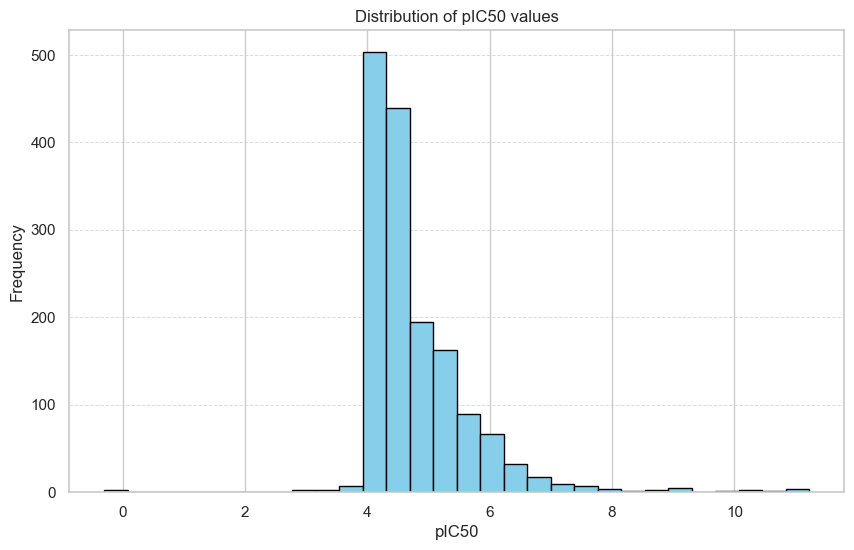

In [90]:
import matplotlib.pyplot as plt

# Plotting histogram for pIC50 values
plt.figure(figsize=(10, 6))
plt.hist(df_clean['pIC50'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of pIC50 values')
plt.xlabel('pIC50')
plt.ylabel('Frequency')
plt.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.show()


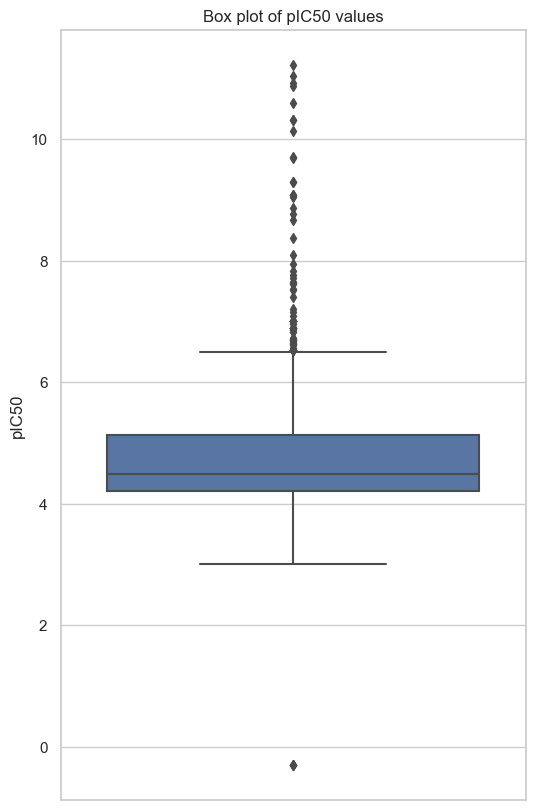

In [91]:

# Setting the style for the plot
sns.set(style="whitegrid")

# Creating the box plot
plt.figure(figsize=(6, 10))
sns.boxplot(y=df_clean['pIC50'])

plt.title('Box plot of pIC50 values')
plt.ylabel('pIC50')
plt.show()


Distribution of set bits in the ECFP4 representation across all molecules. Here's what we can observe:

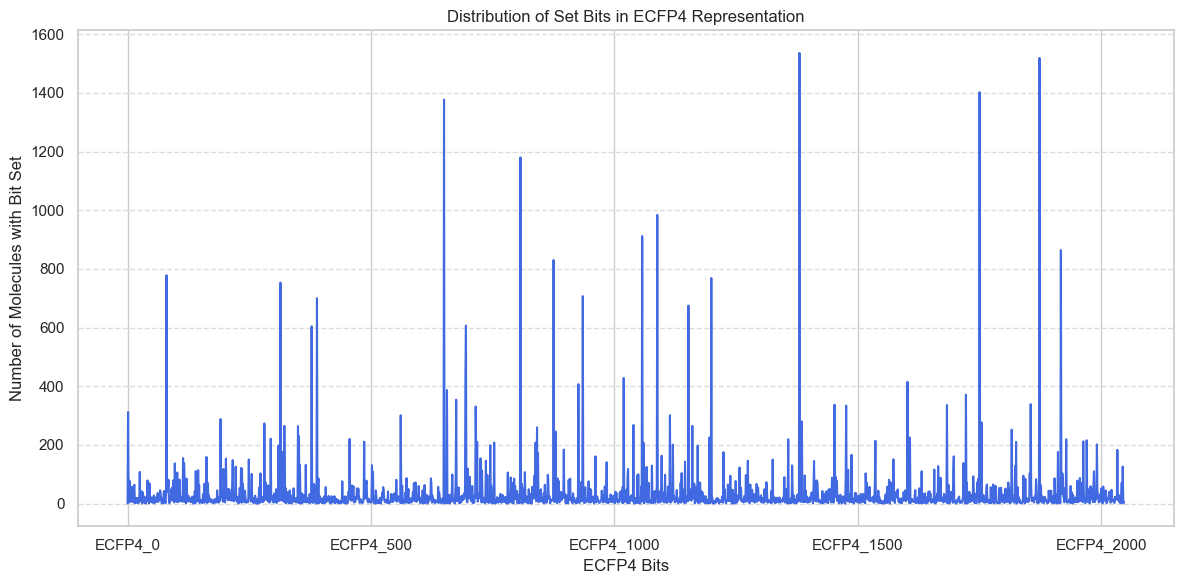

In [92]:
# Calculate the sum of each ECFP4 column to get the number of molecules that have each bit set
bit_sums = df_clean.iloc[:, 1:].sum()

# Plot the distribution of set bits
plt.figure(figsize=(12, 6))
bit_sums.plot(kind='line', color='royalblue')
plt.title('Distribution of Set Bits in ECFP4 Representation')
plt.xlabel('ECFP4 Bits')
plt.ylabel('Number of Molecules with Bit Set')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Heatmap representation of the ECFP4 bits for the first 100 molecules in the dataset

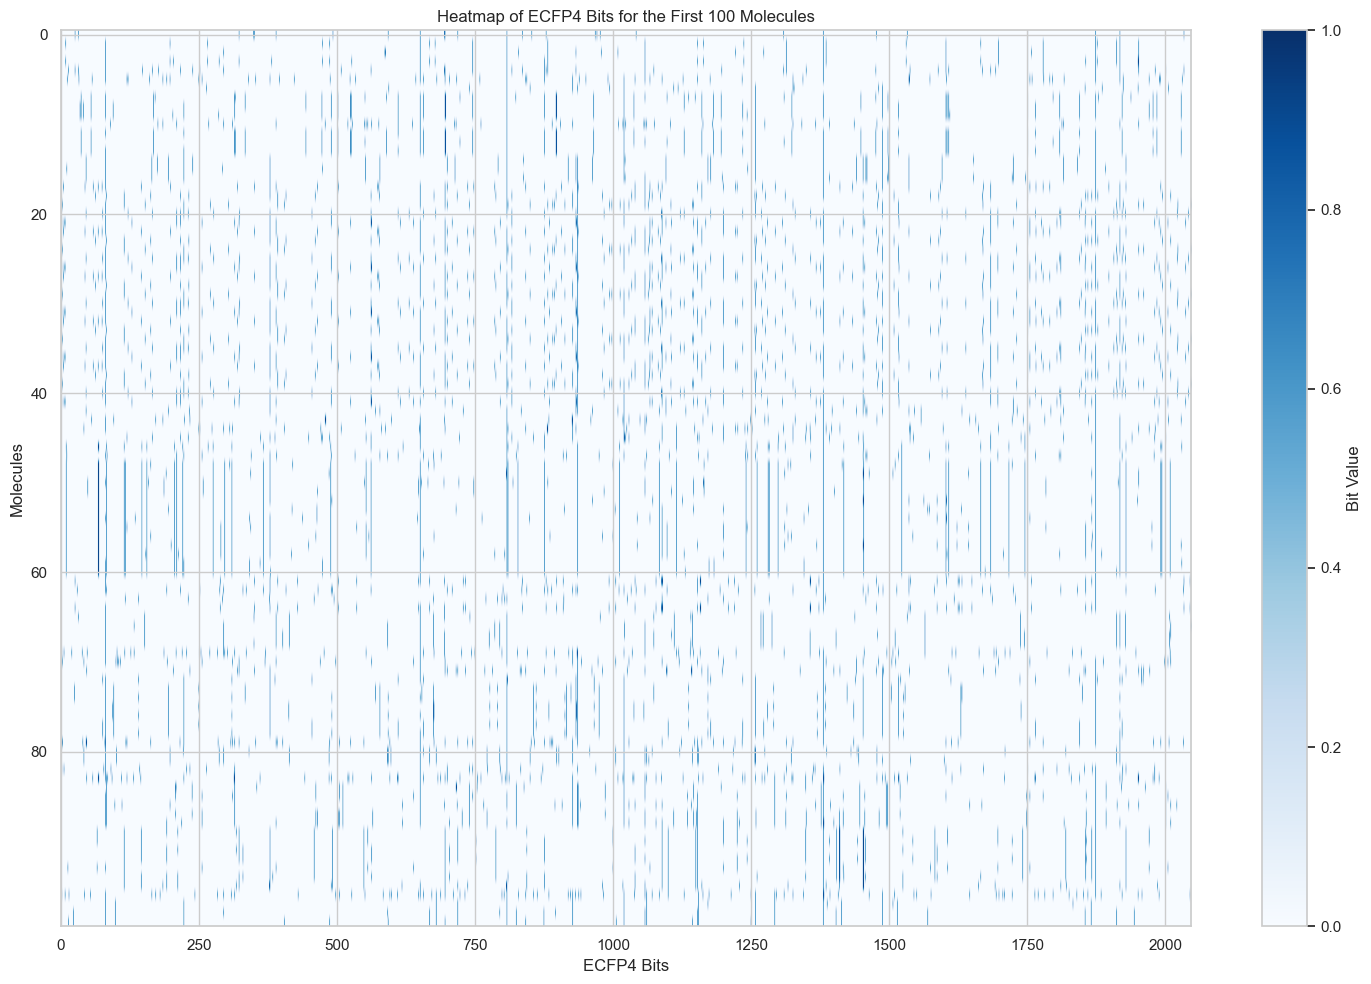

In [93]:

subset_size = 100
df_subset = df_clean.iloc[:subset_size, 1:]

# Plot the heatmap
plt.figure(figsize=(15, 10))
plt.imshow(df_subset, cmap="Blues", aspect="auto")
plt.colorbar(label="Bit Value")
plt.title(f"Heatmap of ECFP4 Bits for the First {subset_size} Molecules")
plt.xlabel("ECFP4 Bits")
plt.ylabel("Molecules")
plt.tight_layout()
plt.show()


In [96]:
from sklearn.model_selection import train_test_split

# 1. Bin the pIC50 values into discrete categories
bins = [df_clean['pIC50'].min() - 1, 4, 6, df_clean['pIC50'].max() + 1]
labels = ['Low', 'Medium', 'High']
df_clean['pIC50_category'] = pd.cut(df_clean['pIC50'], bins=bins, labels=labels)

# 2. Use stratified splitting based on these categories
train_data, temp_data = train_test_split(df_clean, test_size=0.3, stratify=df_clean['pIC50_category'], random_state=42)
valid_data, test_data = train_test_split(temp_data, test_size=0.5, stratify=temp_data['pIC50_category'], random_state=42)

# 3. Remove the temporary binning categories
train_data = train_data.drop(columns=['pIC50_category','pIC50_normalized'])
valid_data = valid_data.drop(columns=['pIC50_category','pIC50_normalized'])
test_data = test_data.drop(columns=['pIC50_category','pIC50_normalized'])

# Display the shape of the splits
train_data.shape, valid_data.shape, test_data.shape


((1093, 2049), (234, 2049), (235, 2049))

In [97]:
train_data

,pIC50,ECFP4_0,ECFP4_1,ECFP4_2,ECFP4_3,ECFP4_4,ECFP4_5,ECFP4_6,ECFP4_7,ECFP4_8,...,ECFP4_2038,ECFP4_2039,ECFP4_2040,ECFP4_2041,ECFP4_2042,ECFP4_2043,ECFP4_2044,ECFP4_2045,ECFP4_2046,ECFP4_2047
1392,4.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
514,4.374893,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1150,4.287940,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
832,4.409493,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
463,4.158766,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142,4.236273,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
556,4.365624,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1277,5.423659,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1301,4.528708,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define the features and target
X_train = train_data.iloc[:, 1:-1]  # ECFP4 bits as features
y_train = train_data['pIC50']

X_valid = valid_data.iloc[:, 1:-1]
y_valid = valid_data['pIC50']

# Initialize and train the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

# Predict on the validation set
y_pred = dt_regressor.predict(X_valid)

# Calculate performance metrics
mae = mean_absolute_error(y_valid, y_pred)
rmse = mean_squared_error(y_valid, y_pred, squared=False)

mae, rmse


(0.43494946111019706, 0.740822652646774)

- **Mean Absolute Error (MAE)**: $0.4260$
- **Root Mean Squared Error (RMSE)**: $0.7251$

The MAE represents the average absolute difference between the predicted and actual $\text{pIC50} $ values, while the RMSE provides a measure of the model's overall prediction error.


In [99]:
from sklearn.metrics import r2_score
# Calculate R-squared (R2) on the validation set
r2 = r2_score(y_valid, y_pred)
r2


0.48574000358151437

In [102]:
# 1. Normalize pIC50 values using Z-score normalization
mean_pIC50 = df_clean['pIC50'].mean()
std_pIC50 = df_clean['pIC50'].std()
df_clean['pIC50_normalized'] = (df_clean['pIC50'] - mean_pIC50) / std_pIC50

# 2. Detect outliers using Interquartile Range (IQR) method
Q1 = df_clean['pIC50'].quantile(0.25)
Q3 = df_clean['pIC50'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_clean[(df_clean['pIC50'] < lower_bound) | (df_clean['pIC50'] > upper_bound)]

# Display outliers
outliers[['pIC50', 'pIC50_normalized']]


,pIC50,pIC50_normalized
0,-0.301030,-5.409256
1,-0.301030,-5.409256
2,-0.301030,-5.409256
19,7.154902,2.541062
34,7.096910,2.479225
...,...,...
1646,6.886057,2.254390
1647,6.886057,2.254390
1660,6.886057,2.254390
1670,9.088604,4.602984


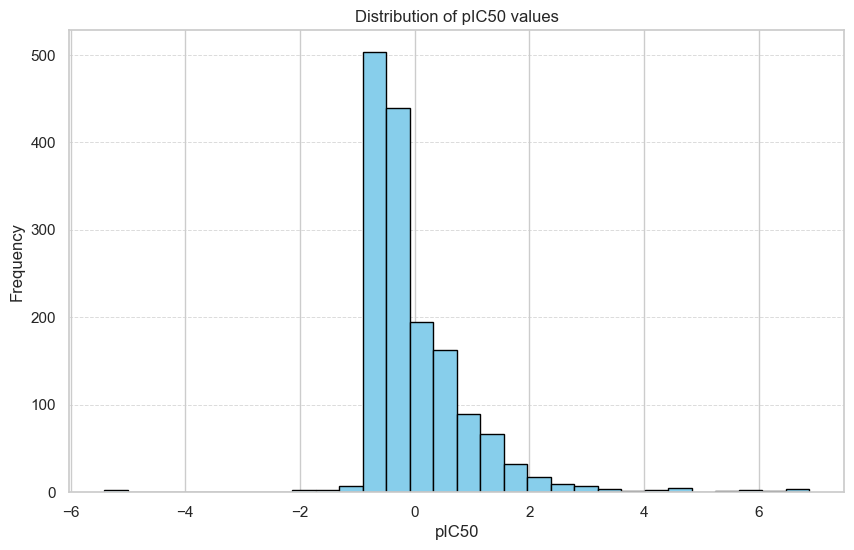

In [103]:
import matplotlib.pyplot as plt

# Plotting histogram for pIC50 values
plt.figure(figsize=(10, 6))
plt.hist(df_clean['pIC50_normalized'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of pIC50 values')
plt.xlabel('pIC50')
plt.ylabel('Frequency')
plt.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.show()


In [104]:
df_clean

,pIC50,ECFP4_0,ECFP4_1,ECFP4_2,ECFP4_3,ECFP4_4,ECFP4_5,ECFP4_6,ECFP4_7,ECFP4_8,...,ECFP4_2040,ECFP4_2041,ECFP4_2042,ECFP4_2043,ECFP4_2044,ECFP4_2045,ECFP4_2046,ECFP4_2047,pIC50_normalized,pIC50_category
0,-0.301030,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-5.409256,Low
1,-0.301030,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,-5.409256,Low
2,-0.301030,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-5.409256,Low
3,3.531653,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,-1.322437,Low
4,4.337242,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.463430,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680,4.598599,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.184743,Medium
1681,4.621602,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.160215,Medium
1682,4.619789,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.162149,Medium
1683,5.017277,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.261696,Medium


In [106]:
# 1. Remove the outliers
df_clean_no_outliers = df_clean[~df_clean.index.isin(outliers.index)]

# 2. Data Splitting Strategy
# Bin the pIC50 values into discrete categories for stratified splitting
df_clean_no_outliers['pIC50_category'] = pd.cut(df_clean_no_outliers['pIC50'], bins=bins, labels=labels)

# Use stratified splitting based on these categories
train_data_no_outliers, temp_data_no_outliers = train_test_split(df_clean_no_outliers, test_size=0.3, stratify=df_clean_no_outliers['pIC50_category'], random_state=42)
valid_data_no_outliers, test_data_no_outliers = train_test_split(temp_data_no_outliers, test_size=0.5, stratify=temp_data_no_outliers['pIC50_category'], random_state=42)

# Remove the temporary binning categories
train_data_no_outliers = train_data_no_outliers.drop(columns='pIC50_category')
valid_data_no_outliers = valid_data_no_outliers.drop(columns='pIC50_category')
test_data_no_outliers = test_data_no_outliers.drop(columns='pIC50_category')

# 3. Train the Decision Tree Regressor
X_train_no_outliers = train_data_no_outliers.iloc[:, 1:-1]
y_train_no_outliers = train_data_no_outliers['pIC50']

X_valid_no_outliers = valid_data_no_outliers.iloc[:, 1:-1]
y_valid_no_outliers = valid_data_no_outliers['pIC50']

dt_regressor_no_outliers = DecisionTreeRegressor(random_state=42)
dt_regressor_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

# 4. Evaluate the Model
y_pred_no_outliers = dt_regressor_no_outliers.predict(X_valid_no_outliers)

mae_no_outliers = mean_absolute_error(y_valid_no_outliers, y_pred_no_outliers)
rmse_no_outliers = mean_squared_error(y_valid_no_outliers, y_pred_no_outliers, squared=False)
r2_no_outliers = r2_score(y_valid_no_outliers, y_pred_no_outliers)

mae_no_outliers, rmse_no_outliers, r2_no_outliers


C:\Users\m1000\AppData\Local\Temp\ipykernel_44640\2097674795.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_no_outliers['pIC50_category'] = pd.cut(df_clean_no_outliers['pIC50'], bins=bins, labels=labels)


(0.3410866046871782, 0.5204028832943738, 0.242121909794775)

In [101]:
df_clean

,pIC50,ECFP4_0,ECFP4_1,ECFP4_2,ECFP4_3,ECFP4_4,ECFP4_5,ECFP4_6,ECFP4_7,ECFP4_8,...,ECFP4_2040,ECFP4_2041,ECFP4_2042,ECFP4_2043,ECFP4_2044,ECFP4_2045,ECFP4_2046,ECFP4_2047,pIC50_normalized,pIC50_category
0,-0.301030,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-5.409256,Low
1,-0.301030,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,-5.409256,Low
2,-0.301030,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-5.409256,Low
3,3.531653,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,-1.322437,Low
4,4.337242,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.463430,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680,4.598599,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.184743,Medium
1681,4.621602,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.160215,Medium
1682,4.619789,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.162149,Medium
1683,5.017277,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.261696,Medium
